<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_eon_solplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Solplanet XML feldolgozás Python alatt


## Használt csomagok:


json, geojson, pandas




Python csomagok helye
https://pypi.org


---


In [ ]:
import datetime
import pandas as pd
import warnings
import datetime as dt
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]

warnings.filterwarnings("ignore")
##kl_file =r'c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\Daily Energy20230'
## c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\Daily Energy20230301.xls
## c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\Daily Energy20230301.xls
kl_file =r'c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\Daily Energy20230'

kl_tartalom  = pd.read_excel(kl_file +'301.xls')  ## 02.01. betöltés
for i in range(302,317):                          ## 02.02-02.28. betöltés  megadása (202,229)
    kl_file2 = kl_file + '{}.xls'.format(i)
#    print(kl_file2)
    kl_tmp = pd.read_excel(kl_file + '{}.xls'.format(i))
    kl_tartalom = kl_tartalom.append(kl_tmp, ignore_index = True)
    
##  dátumtipusra alakítás
kl_tartalom["Time"] = pd.to_datetime(kl_tartalom["Time"],format= "%Y-%m-%d %H:%M:%S")
                    
## egy excelbe mentés
kl_tartalom.to_excel(r"c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\KL_napenergia_ossz.xlsx", sheet_name='Munka1',index=False)

## dátum kiválasztás (szűrés)
kl_tartalom.query("Time >= '2023-03-11' and Time < '2023-03-13'", inplace = True)  ## [128 rows x 5 columns]
#kl_tartalom = kl_tartalom[(kl_tartalom['Time'] > "2023-02-16") & (kl_tartalom['Time'] < "2023-02-17")] 
#kl_tartalom = kl_tartalom[kl_tartalom['Time'].dt.strftime('%Y-%m-%d') == '2023-02-16']

## felesleges mezők kihagyása
kl_tartalom.drop(labels=['SN.','Vpv1', 'Vpv2','Ipv1','Ipv2', 
'Vac1', 'Vac2', 'Vac3', 'Iac1', 'Iac2', 'Iac3','Fac','Temp','E-Total', 'H-Total'], axis=1, inplace=True)


## idő kimetszése
#kl_tartalom["Time2"] = kl_tartalom["Time"].dt.time
#kl_tartalom["Time2"] = kl_tartalom["Time"].dt.hour
#kl_tartalom["Time"] = kl_tartalom["Time"].dt.strftime('%H:%M')

#kl_tartalom["Time2"] = [d.time() for d in kl_tartalom["Time"]]

#pd.to_datetime(kl_tartalom['Time'], format='%H:%M')
        
## mezők kiválasztása megjelenítésnél
#print(kl_tartalom[['Time', 'Pac','E-Today']])

## redezés
kl_tartalom.sort_values(["Pac", "Time"],
               axis = 0, ascending = False,
               inplace = True,
               na_position = "first")

kl_tartalom = kl_tartalom.set_index('Time')

nyomtatas ='''
kl_tartalom['Pac'].plot(kind="bar")
plt.title("Napelem termelés")
plt.xlabel("Dátum")
plt.ylabel("Pac (Wh)")
'''

#kl_tartalom.plot(kind="bar")

print(kl_tartalom.head(20))



                        Pac  E-Today
Time                                
2023-03-11 09:29:35  9919.0      5.9
2023-03-11 09:04:35  9419.0      3.8
2023-03-11 09:59:35  9162.0      8.7
2023-03-11 10:29:35  9050.0     11.7
2023-03-11 10:54:35  8830.0     14.0
2023-03-12 09:52:48  8580.0     18.3
2023-03-12 09:47:48  8530.0     17.6
2023-03-12 09:57:48  8519.0     19.0
2023-03-12 09:42:48  8497.0     16.9
2023-03-12 10:07:48  8489.0     20.5
2023-03-12 10:02:48  8488.0     19.7
2023-03-12 10:17:48  8487.0     21.9
2023-03-12 09:32:48  8454.0     15.5
2023-03-12 09:37:48  8453.0     16.2
2023-03-12 09:27:48  8426.0     14.8
2023-03-12 10:22:48  8421.0     22.6
2023-03-12 10:12:48  8406.0     21.2
2023-03-12 09:07:48  8340.0     12.0
2023-03-12 09:22:48  8328.0     14.1
2023-03-12 10:27:48  8315.0     23.3


                     Time     Pac
Time2                            
9_2   2023-03-12 09:02:48  8073.0
9_7   2023-03-12 09:07:48  8340.0
9_12  2023-03-12 09:12:48  8296.0
9_17  2023-03-12 09:17:48  8258.0
9_22  2023-03-12 09:22:48  8328.0
9_27  2023-03-12 09:27:48  8426.0
9_32  2023-03-12 09:32:48  8454.0
9_37  2023-03-12 09:37:48  8453.0
9_42  2023-03-12 09:42:48  8497.0
9_47  2023-03-12 09:47:48  8530.0
9_52  2023-03-12 09:52:48  8580.0
9_57  2023-03-12 09:57:48  8519.0
10_2  2023-03-12 10:02:48  8488.0
10_7  2023-03-12 10:07:48  8489.0
10_12 2023-03-12 10:12:48  8406.0
10_17 2023-03-12 10:17:48  8487.0
10_22 2023-03-12 10:22:48  8421.0
10_27 2023-03-12 10:27:48  8315.0
10_32 2023-03-12 10:32:48  8257.0
10_37 2023-03-12 10:37:48  8257.0


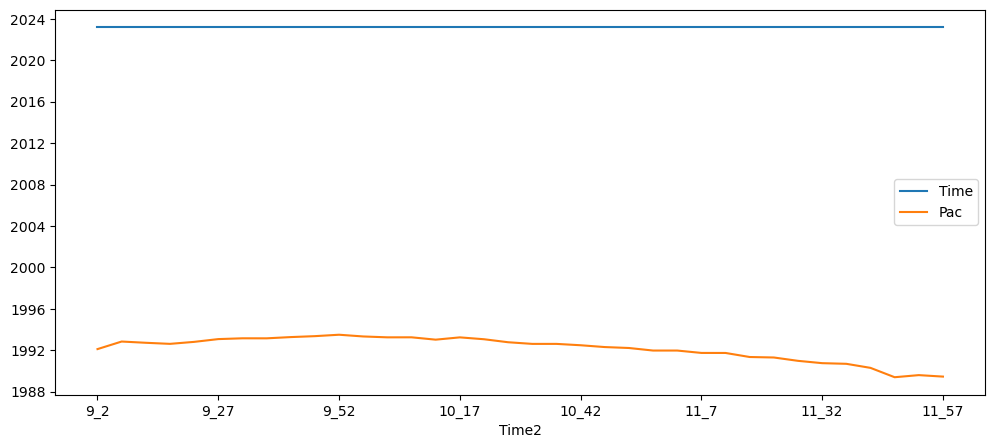

In [ ]:
## napi csúcs pillanatnyi termelés keresése
import datetime
import pandas as pd
import warnings
import datetime as dt
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]
warnings.filterwarnings("ignore")

kl_file = r"c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\KL_napenergia_ossz.xlsx"
kl_tartalom = pd.read_excel(kl_file)

##  dátumtipusra alakítás
kl_tartalom["Time"] = pd.to_datetime(kl_tartalom["Time"],format= "%Y-%m-%d %H:%M:%S") ## 2023.03.01  6:22:58

## dátum kiválasztás (szűrés)
kl_tartalom.query("Time >= '2023-03-12 09:00' and Time < '2023-03-12 12:00'", inplace = True)  ## [128 rows x 5 columns]

## felesleges mezők kihagyása
kl_tartalom.drop(labels=['SN.','Vpv1', 'Vpv2','Ipv1','Ipv2', 
'Vac1', 'Vac2', 'Vac3', 'Iac1', 'Iac2', 'Iac3','Fac','Temp','E-Total', 'H-Total', 'E-Today'], axis=1, inplace=True)

##  ora:perc_másodperc alakítás
kl_tartalom["Time2"] = pd.to_datetime(kl_tartalom["Time"],format= "%H:%M:%S") ## 2023.03.01  6:22:58

## redezés
kl_tartalom.sort_values(["Time2", "Pac"],
               axis = 0, ascending = True,  #False,
               inplace = True,
               na_position = "first")


#kl_tartalom['min']  = kl_tartalom["Time"].dt.round("min").dt.minute
kl_tartalom['Time2']  = kl_tartalom["Time2"].dt.hour.astype('string') + '_'+ kl_tartalom["Time"].dt.minute.astype('string')  ##,d1.second)
kl_tartalom['Pac']  = kl_tartalom["Pac"].astype(float)

kl_tartalom = kl_tartalom.set_index('Time2')

print(kl_tartalom.head(20))

kl_tartalom.plot()

#kl_tartalom.Time = pd.to_numeric(kl_tartalom.Time)
#kl_tartalom.plot.scatter(x = 'Time', y = 'Pac')
#kl_tartalom.plot(kind = 'scatter', x = 'Time', y = 'Pac')

plt.show()


In [ ]:
### max keresés
df= kl_tartalom
print(df.loc[df['Pac'].idxmax()])
print('-----------1-----------')
print(df.iloc[df.Pac.argmax(), 0:2])
print('-----------2----------')
print(df[df['Pac'] > df['Pac'].max()-200.0])  ## 
print('-----------3----------')
print(df[df.Pac == df.Pac.max()])
print('-----------4-----------')
print( df.loc[df['Pac'].idxmax()])
print('-----------5-----------')
print(df.query('Pac == Pac.max()'))

df['Time_uj'] = df['Time'] + pd.Timedelta(hours=24, minutes=0, seconds=0)  # egy nap hozzáadás
print(df)

### összefüzés
#print(df1.merge(df2, left_on='ID1', right_on='ID2'))
#print(pd.merge(df1, df2, how="outer", on=["Time", "DATE"]

### formázott taralom összefüzés
a = 12
b = '00'
c = 34
s = int(f"{a}{b}{c}")
print(s+1)


Time       2023-03-12 09:52:48
Pac                     8580.0
Time_uj    2023-03-13 09:52:48
Name: 9_52, dtype: object
-----------1-----------
Time    2023-03-12 09:52:48
Pac                  8580.0
Name: 9_52, dtype: object
-----------2----------
                     Time     Pac             Time_uj
Time2                                                
9_27  2023-03-12 09:27:48  8426.0 2023-03-13 09:27:48
9_32  2023-03-12 09:32:48  8454.0 2023-03-13 09:32:48
9_37  2023-03-12 09:37:48  8453.0 2023-03-13 09:37:48
9_42  2023-03-12 09:42:48  8497.0 2023-03-13 09:42:48
9_47  2023-03-12 09:47:48  8530.0 2023-03-13 09:47:48
9_52  2023-03-12 09:52:48  8580.0 2023-03-13 09:52:48
9_57  2023-03-12 09:57:48  8519.0 2023-03-13 09:57:48
10_2  2023-03-12 10:02:48  8488.0 2023-03-13 10:02:48
10_7  2023-03-12 10:07:48  8489.0 2023-03-13 10:07:48
10_12 2023-03-12 10:12:48  8406.0 2023-03-13 10:12:48
10_17 2023-03-12 10:17:48  8487.0 2023-03-13 10:17:48
10_22 2023-03-12 10:22:48  8421.0 2023-03-13 10:22

In [ ]:
## Solplanet napi csúcs pillanatnyi termelés keresése
import datetime
import pandas as pd
import warnings
import datetime as dt
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]
warnings.filterwarnings("ignore")

kl_file = r"c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\KL_napenergia_ossz202302.xlsx"
kl_tartalom = pd.read_excel(kl_file, sheet_name='forras')

##  dátumtipusra alakítás (napra csonkolás)
kl_tartalom["Time"] = pd.to_datetime(kl_tartalom["Time"],format= "%Y-%m-%d %H:%M:%S").dt.date
#print(kl_tartalom)
#print('-------------------------')

## felesleges mezők kihagyása
kl_tartalom.drop(labels=['SN.','Vpv1', 'Vpv2','Ipv1','Ipv2', 
'Vac1', 'Vac2', 'Vac3', 'Iac1', 'Iac2', 'Iac3','Fac','Temp', 'H-Total', 'Pac'], axis=1, inplace=True)
## 'E-Total', 'E-Today'
solplanet = kl_tartalom.groupby("Time").max()
print('------------max érték-------------')
print(kl_tartalom.max())

print('------------max értékek naponta-------------')
print(solplanet)


------------max érték-------------
Time       2023-02-28
E-Total         630.2
E-Today          40.0
dtype: object
------------max értékek naponta-------------
            E-Total  E-Today
Time                        
2023-02-01      1.4      1.4
2023-02-02     25.6     24.2
2023-02-03     27.2      1.6
2023-02-04     39.9     12.7
2023-02-05     65.4     25.5
2023-02-06     91.3     25.9
2023-02-07    124.7     33.4
2023-02-08    159.3     34.6
2023-02-09    193.8     34.5
2023-02-10    227.5     33.7
2023-02-11    248.5     21.0
2023-02-12    279.2     30.7
2023-02-13    314.6     35.4
2023-02-14    350.1     35.5
2023-02-15    386.0     35.9
2023-02-16    407.8     21.8
2023-02-17    422.3     14.5
2023-02-18    442.7     20.4
2023-02-19    456.8     14.1
2023-02-20    474.0     17.2
2023-02-21    514.0     40.0
2023-02-22    534.2     20.2
2023-02-23    543.6      9.4
2023-02-24    569.9     26.3
2023-02-25    581.1     11.2
2023-02-26    590.7      9.6
2023-02-27    608.6     17.9

In [ ]:
## EON napi csúcs pillanatnyi termelés keresése
import datetime
import pandas as pd
import warnings
import datetime as dt
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [12, 5]

warnings.filterwarnings("ignore")

kl_file = r"c:\Users\kecskemetil\Documents\sj\napelem\eon_napok\eon_napi_fogy_term_kl.xlsx"
kl_tartalom = pd.read_excel(kl_file)
## üres cserélésése 0-ra
kl_tartalom.fillna(0,inplace=True)
#kl_tartalom = kl_tartalom.fillna(0)

##  dátumtipusra alakítás (napra csonkolás)
kl_tartalom["Idő"] = pd.to_datetime(kl_tartalom["Idő"],format= "%Y-%m-%d %H:%M:%S").dt.date
kl_tartalom["Idő"] = kl_tartalom["Idő"] - pd.Timedelta(hours=24, minutes=0, seconds=0)  # egy nap elvétele 

## felesleges mezők kihagyása
kl_tartalom.drop(labels=['Nappali DP_1-1:3.8.0*1','Nappali DP_1-1:4.8.0*1', 'Fogy15[kWh]', 'Term15[kWh]'], axis=1, inplace=True)
kl_tartalom = kl_tartalom.astype({'FogyNp[kWh]':'float','TermNp[kWh]':'float'})


#kl_tartalom['FogyNp[kWh]_uj'] =   kl_tartalom['FogyNp[kWh]'].shift(-1)
#kl_tartalom['FogyNp[kWh]_uj'] = kl_tartalom['FogyNp[kWh]'].diff()
#kl_tartalom = kl_tartalom.diff(axis=1)
#df =kl_tartalom['Idő'].shift(-1) 

print('------------max érték-------------')
print(kl_tartalom.max())

print('------------max értékek naponta-------------')
eon = kl_tartalom.groupby("Idő").max()
print(eon)

print('------------max értékek naponta2-------------')
#df['DIFF'] = df.groupby('Idő')['FogyNp[kWh]'].apply(lambda x: x - x.shift(1)).fillna(0)
#print(df)

------------max érték-------------
Idő            2023-02-28
FogyNp[kWh]       220.437
TermNp[kWh]       554.711
dtype: object
------------max értékek naponta-------------
            FogyNp[kWh]  TermNp[kWh]
Idő                                 
2023-01-31        0.000        0.000
2023-02-01        3.774        1.113
2023-02-02       10.991       23.146
2023-02-03       27.420       23.651
2023-02-04       38.404       34.271
2023-02-05       52.082       54.455
2023-02-06       58.019       78.959
2023-02-07       65.290      111.178
2023-02-08       72.391      141.962
2023-02-09       86.684      171.488
2023-02-10       94.539      202.470
2023-02-11      102.160      219.726
2023-02-12      114.188      244.711
2023-02-13      119.458      277.997
2023-02-14      124.083      311.977
2023-02-15      133.923      345.505
2023-02-16      143.289      363.081
2023-02-17      148.332      375.794
2023-02-18      158.496      391.736
2023-02-19      165.351      402.445
2023-02-20    

-----------------
            E-Total  E-Today  FogyNp[kWh]  TermNp[kWh]  Fogy_delta  Term_delta
Time                                                                          
2023-02-01      1.4      1.4        3.774        1.113       3.774       1.113
2023-02-02     25.6     24.2       10.991       23.146       7.217      22.033
2023-02-03     27.2      1.6       27.420       23.651      16.429       0.505
2023-02-04     39.9     12.7       38.404       34.271      10.984      10.620
2023-02-05     65.4     25.5       52.082       54.455      13.678      20.184
2023-02-06     91.3     25.9       58.019       78.959       5.937      24.504
2023-02-07    124.7     33.4       65.290      111.178       7.271      32.219
2023-02-08    159.3     34.6       72.391      141.962       7.101      30.784
2023-02-09    193.8     34.5       86.684      171.488      14.293      29.526
2023-02-10    227.5     33.7       94.539      202.470       7.855      30.982
2023-02-11    248.5     21.0      

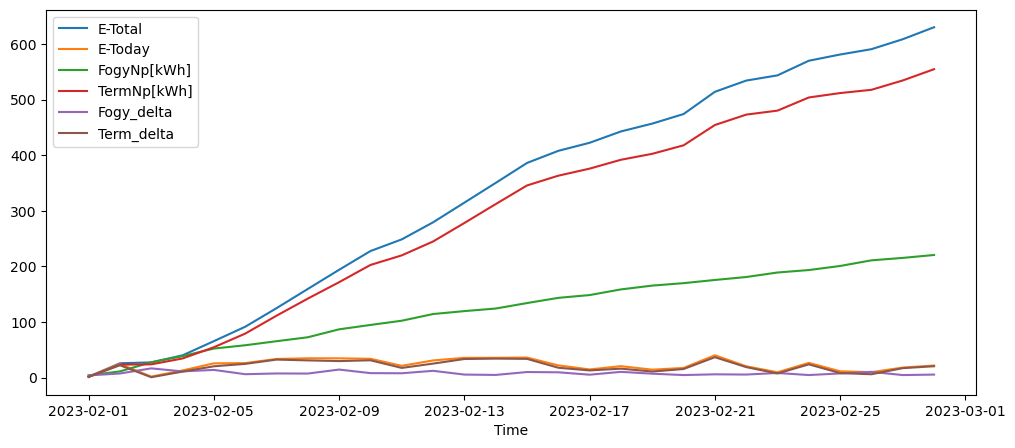

In [ ]:
import matplotlib.pyplot as plt

### összefüzés
eon.index.name = 'Idő'
# eon['Fogy_eltolt'] =  eon['FogyNp[kWh]'].shift(1)
eon['Fogy_delta'] = eon['FogyNp[kWh]'].diff()
eon['Term_delta'] = eon['TermNp[kWh]'].diff()
solplanet.index.name = 'Time'
#print(eon)
print('-----------------')
print(solplanet.merge(eon, left_on='Time', right_on='Idő', right_index=True))
print('-----------------')
kimenet = pd.merge(solplanet, eon, left_on='Time', right_on='Idő', right_index=True)
print( kimenet.columns)

#print(pd.merge(solplanet, eon, how="inner", on=["Time", "Idő"]))
#print(solplanet[['Idő', 'FogyNp[kWh]','TermNp[kWh]']].merge(eon, how="inner" , left_on='Time', right_on='Idő'))
#print(pd.merge(solplanet, eon))

## egy excelbe mentés
# kimenet.to_excel(r"c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\KL_eon_solplanet_ossz.xlsx", sheet_name='Munka1',index=True)

dt = datetime.datetime.now() - datetime.timedelta(days=1)  ## tegnapi nap
datum  = '{:%Y-%m-%d}'.format(dt)
# Excel írható objektum létrehozása (név tartalmazza a futás dátumot)
writer = pd.ExcelWriter(r'c:\Users\kecskemetil\Documents\sj\napelem\solplanet_napok\t202303\KL_eon_solplanet_ossz_'+datum+'_kesz.xlsx')
kimenet.to_excel(writer, sheet_name='Havi_ossz', index=True)

workbook  = writer.book
worksheet = writer.sheets['Havi_ossz']
(max_row, max_col) = kimenet.shape

#worksheet.autofilter(0, 0, max_row, max_col - 1)  # auto szűrő és adattábla létrehozása
## idex mező miatt kell
indexek=['Ido']
indexek.extend(kimenet.columns)

# Tábla formázás
column_settings = [{'header': column} for column in indexek]
#worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings}) ## index nélkül
#worksheet.set_column(0, max_col - 1, 15) ## oszlop szélessség 15-re állítás   ## index nélkül

worksheet.add_table(0, 0, max_row, max_col , {'columns': column_settings}) ## index nélkül
worksheet.set_column(0, max_col , 15) ## oszlop szélessség 15-re állítás   ## index nélkül


# diagram beszúrás
chart = workbook.add_chart({'type': 'line'})               ## column, pie, line, area, scatter' // circle', 'size': 7}

## első oszlop a kategoria, tobbi oszlop adatok és az értékek 
for i in range(max_col):
    if i != 0 :
        chart.add_series({
'name': ['Havi_ossz', 0, i],
'categories': ['Havi_ossz', 1, 0, max_row , 0],
'values': ['Havi_ossz', 1, i, max_row ,i],
#'overlap':-10,
})



worksheet.insert_chart(1, max_col +1, chart)


# Az excel állomány mentése
writer.save()
writer.close()

kimenet.plot()
plt.show()
